In [1]:
import numpy as np
import pandas as pd
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import folium
from folium import plugins

In [2]:
#https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

In [2]:
wordcloud.__version__

'1.8.0'

In [3]:
alice_text = open('alice_novel.txt', 'r').read()

In [4]:
print(alice_text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Posting Date: June 25, 2008 [EBook #11]
Release Date: March, 1994
[Last updated: December 20, 2011]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***










ALICE'S ADVENTURES IN WONDERLAND

Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0




CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without picture

In [5]:
print(alice_text[1000:1500])

s or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it


In [6]:
wordcloud.STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [7]:
en_stopwords = wordcloud.STOPWORDS

In [8]:
word_cloud = wordcloud.WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=en_stopwords
)

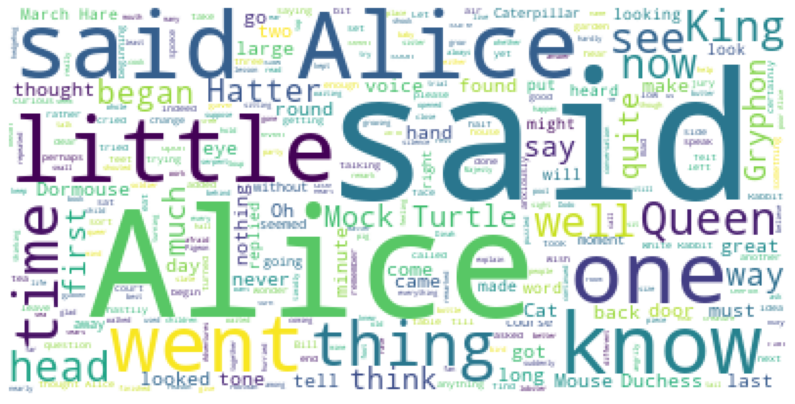

In [10]:
word_cloud.generate(alice_text)
plt.figure(figsize=(14,9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [14]:
alice_img = Image.open('alice_mask.png')
alice_mask = np.array(alice_img)

In [15]:
alice_mask.shape

(900, 900)

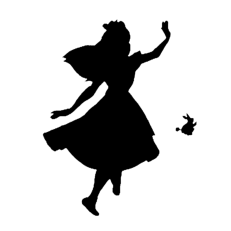

In [17]:
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

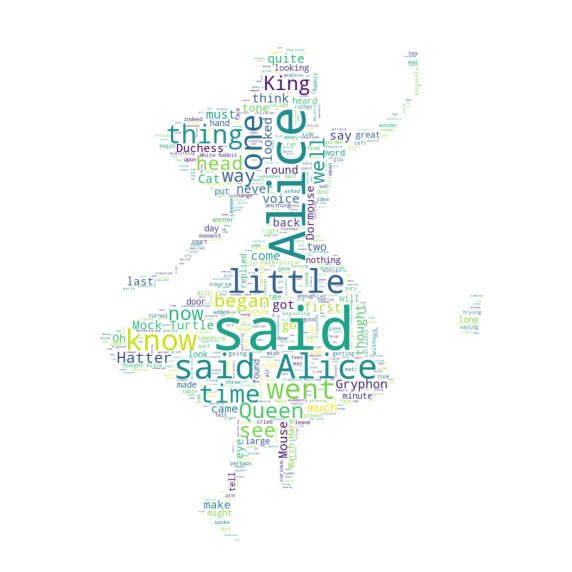

In [24]:
alice_wc = wordcloud.WordCloud(
    background_color='white',
    max_words=3000,
    mask=alice_mask,
    stopwords=en_stopwords
)
alice_wc.generate(alice_text)
plt.figure(figsize=(10, 15))
plt.imshow(alice_wc)
plt.axis('off')
plt.show()

In [42]:
df_canada = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

df_canada['total'] = df_canada.sum(axis=1)

In [58]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1223,856,702,560,716,561,539,620,603,18433
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,1,0,0,0,0,0,0,0,2774
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,1,1,0,0,0,0,1,1,2749


In [59]:
max_words = 100
text = ''
for country in df_canada.OdName.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(
            df_canada.loc[
                df_canada['OdName']==country,
                "total"
            ] / float(df_canada['total'].sum()) * max_words
        )
        text = text + ((country + ' ') * repeat_num_times)

print(text)

Algeria Bangladesh China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Iraq Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania 


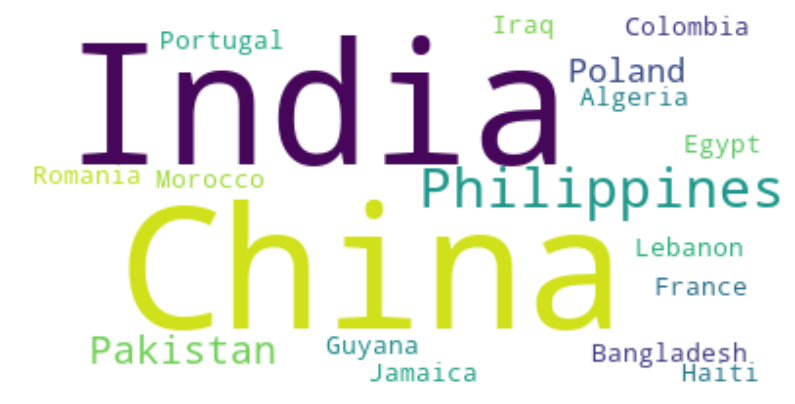

In [61]:
immigrant_wc = wordcloud.WordCloud(background_color='white').generate(text)
plt.figure(figsize=(14, 9))
plt.imshow(immigrant_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
years = list(range(1980, 2014))
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total = df_total.reset_index()
df_total.columns = ['years', 'total']
df_total.head()

,years,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


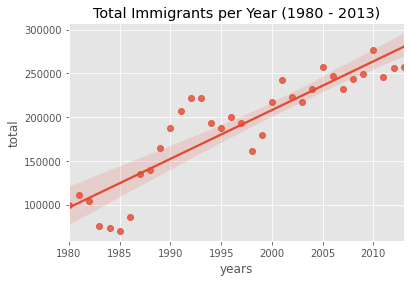

In [71]:
plt.style.use('ggplot')
sns.regplot(x='years', y='total', data=df_total)
plt.title('Total Immigrants per Year (1980 - 2013)')
plt.show()

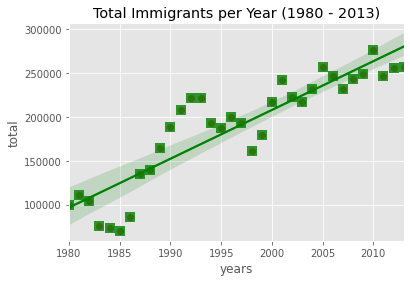

In [79]:
plt.scatter(df_total['years'], df_total['total'], linewidth=1)
plt.style.use('ggplot')
sns.regplot(
    x='years', 
    y='total', 
    color='green', 
    marker='+', 
    data=df_total, 
    scatter_kws={
        's': 100,
        'linewidth': 10
    })
plt.title('Total Immigrants per Year (1980 - 2013)')
plt.show()

In [81]:
folium.__version__

'0.11.0'

In [84]:
maps = folium.Map()
maps

In [92]:
makassar = folium.Map(location=(-5.164313, 119.468031), zoom_start=20, tiles='stamen toner')
makassar

In [3]:
sf_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [4]:
sf_incidents.shape

(150500, 13)

In [5]:
sf_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [6]:
sf_lat = 37.77
sf_long = -122.42

sf_map = folium.Map(location=(sf_lat, sf_long), zoom_start=12)
sf_map

In [7]:
incidents = folium.map.FeatureGroup()

subset_sf_incidents = sf_incidents.loc[:25] 

for lat, long in zip(subset_sf_incidents.Y, subset_sf_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            location=(lat, long),
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

labels = sf_incidents.Category.tolist()

for lat, long, labelspop in zip(subset_sf_incidents)

sf_map.add_child(incidents)

In [8]:
sf_map = folium.Map((sf_lat, sf_long), zoom_start=12)
incidents = plugins.MarkerCluster().add_to(sf_map)

foliumr lat, long, label in zip(subset_sf_incidents.Y, subset_sf_incidents.X, labels):
    folium.Marker(
        location=(lat, long),
        icon=None,
        popup=label
    ).add_to(incidents)

SyntaxError: invalid syntax (<ipython-input-8-952e5f535310>, line 4)